In [ ]:
# TODO: find ways of kernel approx for Y kernel matrix. Regression tasks need this.

In [1]:
import gc
from workflows import *
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
MAX_OUT_DIM = 10
TRIALS = 5
algos = ['pca', 'spca', 'kspca', 'srp+rff', 'ksrp+rff']
#algos = ['srp']

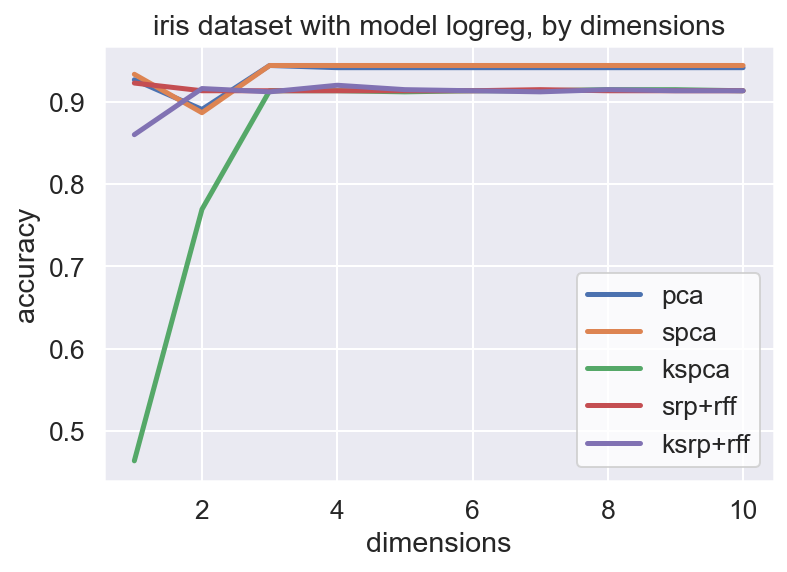

In [3]:
dset = 'iris'
task = 'class'
head = 'logreg'
metric = 'accuracy'
#out_dims = np.arange(1,11)
res_mat, out_dims = experiment(TRIALS, MAX_OUT_DIM, dset, task, head, metric, algos)
#res_mat, out_dims = experiment2(TRIALS, out_dims, dset, task, head, metric, algos)
plot_exp_result(res_mat, out_dims, dset, head, metric, algos)

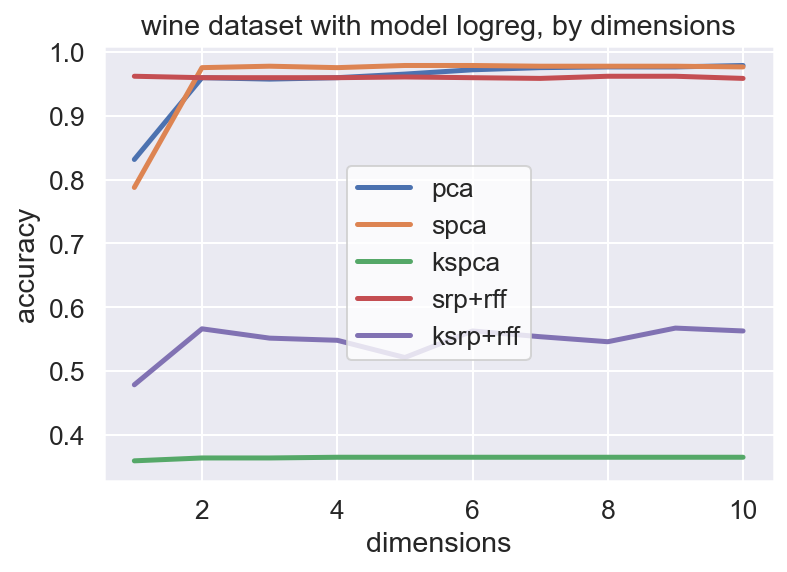

In [4]:
dset = 'wine'
task = 'class'
head = 'logreg'
metric = 'accuracy'
#out_dims = np.arange(10,110,10)
res_mat, out_dims = experiment(TRIALS, MAX_OUT_DIM, dset, task, head, metric, algos)
#res_mat, out_dims = experiment2(TRIALS, out_dims, dset, task, head, metric, algos)
plot_exp_result(res_mat, out_dims, dset, head, metric, algos)

In [ ]:
dset = 'digits'
task = 'class'
head = 'logreg'
metric = 'accuracy'
#out_dims = np.arange(10,110,10)
res_mat, out_dims = experiment(TRIALS, MAX_OUT_DIM, dset, task, head, metric, algos)
#res_mat, out_dims = experiment2(TRIALS, out_dims, dset, task, head, metric, algos)
plot_exp_result(res_mat, out_dims, dset, head, metric, algos)

In [ ]:
max_out_dim = 10
out_dims = np.arange(1, max_out_dim+1)
dset = 'fmnist'
task = 'class'
head = 'logreg'
metric = 'accuracy'
#out_dims = np.arange(10,110,10)
res_mat, out_dims = experiment(TRIALS, MAX_OUT_DIM, dset, task, head, metric, algos)
#res_mat, out_dims = experiment2(TRIALS, out_dims, dset, task, head, metric, algos)
plot_exp_result(res_mat, out_dims, dset, head, metric, algos)

In [ ]:
dset = 'bcancer'
task = 'class'
head = 'logreg'
metric = 'accuracy'
res_mat, out_dims = experiment(TRIALS, MAX_OUT_DIM, dset, task, head, metric, algos)
plot_exp_result(res_mat, out_dims, dset, head, metric, algos)

C:\Users\Jared\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

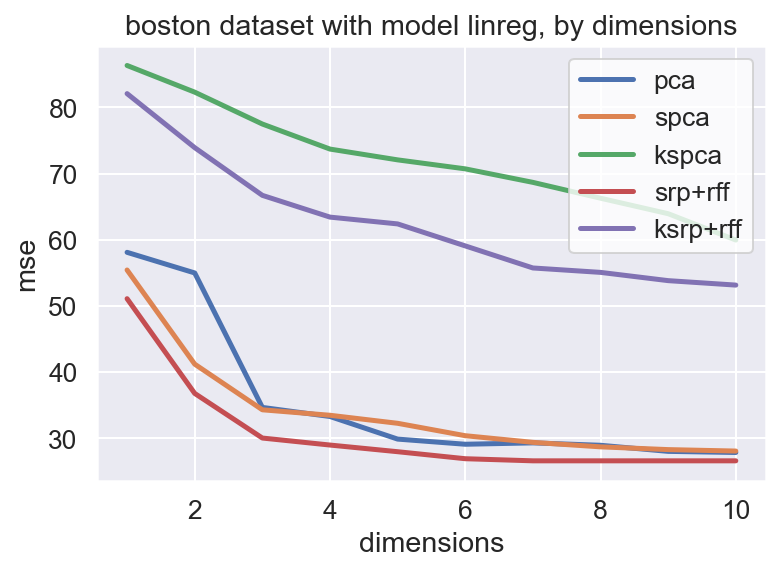

In [5]:
dset = 'boston'
task = 'reg'
head = 'linreg'
metric = 'mse'
res_mat, out_dims = experiment(TRIALS, MAX_OUT_DIM, dset, task, head, metric, algos)
plot_exp_result(res_mat, out_dims, dset, head, metric, algos)